In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../../../data/data_latinoamerica.csv")

In [6]:
df = df[df['location_key'] == 'AR']

In [7]:
df.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


### Contar cuantos valores Nulos tiene cada columna

In [8]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
new_confirmed                              4
new_deceased                               4
cumulative_confirmed                       4
cumulative_deceased                        4
cumulative_vaccine_doses_administered    367
average_temperature_celsius                6
minimum_temperature_celsius                6
maximum_temperature_celsius                6
rainfall_mm                                6
relative_humidity                          6
new_recovered                            991
cumulative_recovered                     991
dtype: int64


### Contar cuantos 0 tiene cada columna

In [9]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 123 rows with zero values.
Column 'new_deceased' has 165 rows with zero values.
Column 'cumulative_confirmed' has 9 rows with zero values.
Column 'cumulative_deceased' has 43 rows with zero values.
Column 'rainfall_mm' has 638 rows with zero values.

Counts of zero values per column: {'new_confirmed': 123, 'new_deceased': 165, 'cumulative_confirmed': 9, 'cumulative_deceased': 43, 'rainfall_mm': 638}


# Transformacion de DF

#### Realizo un filtrado debido que anterior y posterior a estas fechas hay valores nulos y/o datos errones

In [10]:
# Definir el rango de fechas
start_date = '2020-01-01'
end_date = '2022-08-31'

# Filtrar el DataFrame para mantener las filas dentro del rango de fechas
df_ar= df[(df['date'] >= start_date) & (df['date'] <= end_date)]

#### Elimino estas columnas por: 
#### las 2 primeras columnas tienen valores errones
#### la 3ra columna tiene muchos valores en 0
#### la 4 y 5ta columna tienen puros valores nulos
#### la 6 y 7ma columna no concuerdan con el de poblacion 
#### Prefiero trabajar con el promedio de la temperatura del dia

In [11]:
columns_to_drop = [
    'cumulative_confirmed', 
    'cumulative_deceased', 
    'rainfall_mm', 
    'new_recovered',
    'cumulative_recovered',
    'population_rural',
    'population_urban', 
    'minimum_temperature_celsius', 
    'maximum_temperature_celsius'
]

# Eliminar las columnas
df_ar = df_ar.copy()
df_ar.drop(columns=columns_to_drop, inplace=True)

In [12]:
df_ar.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
0,AR,2020-01-01,AR,Argentina,3.0,0.0,NaN,44938712.0,19523766.0,20593330.0,...,23.500000,64.426444,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
1,AR,2020-01-02,AR,Argentina,14.0,0.0,NaN,44938712.0,19523766.0,20593330.0,...,23.687500,65.073967,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
2,AR,2020-01-03,AR,Argentina,3.0,0.0,NaN,44938712.0,19523766.0,20593330.0,...,25.194444,59.669389,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
3,AR,2020-01-04,AR,Argentina,7.0,0.0,NaN,44938712.0,19523766.0,20593330.0,...,26.305556,53.485178,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
4,AR,2020-01-05,AR,Argentina,5.0,0.0,NaN,44938712.0,19523766.0,20593330.0,...,25.888889,57.126165,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8


In [13]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df_ar.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
cumulative_vaccine_doses_administered    363
average_temperature_celsius                2
relative_humidity                          2
dtype: int64


In [14]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df_ar.columns[(df_ar == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df_ar[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 112 rows with zero values.
Column 'new_deceased' has 154 rows with zero values.

Counts of zero values per column: {'new_confirmed': 112, 'new_deceased': 154}


#### Vamos a imputar las columnas que tienen valores nulos y ceros 

In [15]:
# Imputación con la media para columnas específicas

df_ar.loc[:, 'average_temperature_celsius'] = df_ar['average_temperature_celsius'].fillna(df_ar['average_temperature_celsius'].mean())
df_ar.loc[:, 'relative_humidity'] = df_ar['relative_humidity'].fillna(df_ar['relative_humidity'].mean())


In [16]:
# Rellenar con 0 donde la fecha sea menor a '2021-02-17'
fecha_limite = '2020-12-29'
df_ar.loc[df['date'] < fecha_limite] = df_ar.loc[df['date'] < fecha_limite].fillna(0)

In [17]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 123 rows with zero values.
Column 'new_deceased' has 165 rows with zero values.
Column 'cumulative_confirmed' has 9 rows with zero values.
Column 'cumulative_deceased' has 43 rows with zero values.
Column 'rainfall_mm' has 638 rows with zero values.

Counts of zero values per column: {'new_confirmed': 123, 'new_deceased': 165, 'cumulative_confirmed': 9, 'cumulative_deceased': 43, 'rainfall_mm': 638}


In [18]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ar.describe()

,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_density,human_development_index,population_age_00_09,population_age_10_19,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,9905.94,133.18,20682192.62,44938712.00,19523766.00,20593330.00,16.51,0.82,6718871.00,7045513.00,...,17.65,56.19,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
std,19475.29,155.13,32128263.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6.29,14.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,44938712.00,19523766.00,20593330.00,16.52,0.82,6718871.00,7045513.00,...,3.43,23.42,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
25%,605.75,8.00,0.00,44938712.00,19523766.00,20593330.00,16.52,0.82,6718871.00,7045513.00,...,12.44,46.47,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
50%,4374.50,73.00,3682769.50,44938712.00,19523766.00,20593330.00,16.52,0.82,6718871.00,7045513.00,...,17.73,55.79,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
75%,11440.25,214.00,30931468.25,44938712.00,19523766.00,20593330.00,16.52,0.82,6718871.00,7045513.00,...,22.83,65.73,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
max,174174.00,656.00,109007243.00,44938712.00,19523766.00,20593330.00,16.52,0.82,6718871.00,7045513.00,...,33.09,94.58,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80


In [19]:
#calcular columna vacunas administradas por dia
g=df_ar.cumulative_vaccine_doses_administered.tolist()
h=[0.0]
for i in range(1,len(g)):
    h.append(g[i]-g[i-1])
df_ar['vaccine_doses_administered_for_day']=h

df_ar.vaccine_doses_administered_for_day.max()

68283695.0

In [20]:
df_ar.drop(columns='cumulative_vaccine_doses_administered', inplace=True)

In [21]:
# Crear la columna del acumulado de vacunas diarias
df_ar['cumulative_vaccine_doses_administered'] = df_ar['vaccine_doses_administered_for_day'].cumsum()

col = list(df_ar.columns)
col.remove('cumulative_vaccine_doses_administered')
col.insert(7, 'cumulative_vaccine_doses_administered')
df_ar = df_ar[col]
df_ar

,location_key,date,country_code,country_name,new_confirmed,new_deceased,population,cumulative_vaccine_doses_administered,population_male,population_female,...,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,vaccine_doses_administered_for_day
0,AR,2020-01-01,AR,Argentina,3.00,0.00,44938712.00,0.00,19523766.00,20593330.00,...,64.43,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,0.00
1,AR,2020-01-02,AR,Argentina,14.00,0.00,44938712.00,0.00,19523766.00,20593330.00,...,65.07,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,0.00
2,AR,2020-01-03,AR,Argentina,3.00,0.00,44938712.00,0.00,19523766.00,20593330.00,...,59.67,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,0.00
3,AR,2020-01-04,AR,Argentina,7.00,0.00,44938712.00,0.00,19523766.00,20593330.00,...,53.49,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,0.00
4,AR,2020-01-05,AR,Argentina,5.00,0.00,44938712.00,0.00,19523766.00,20593330.00,...,57.13,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,AR,2022-08-27,AR,Argentina,0.00,0.00,44938712.00,108913874.00,19523766.00,20593330.00,...,36.74,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,7091.00
970,AR,2022-08-28,AR,Argentina,0.00,0.00,44938712.00,108916883.00,19523766.00,20593330.00,...,34.53,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,3009.00
971,AR,2022-08-29,AR,Argentina,0.00,0.00,44938712.00,108948580.00,19523766.00,20593330.00,...,32.64,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,31697.00
972,AR,2022-08-30,AR,Argentina,0.00,0.00,44938712.00,108977960.00,19523766.00,20593330.00,...,33.48,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,29380.00


In [22]:
col = list(df_ar.columns)
col.remove('vaccine_doses_administered_for_day')
col.insert(6, 'vaccine_doses_administered_for_day')
df_ar = df_ar[col]
df_ar

,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
0,AR,2020-01-01,AR,Argentina,3.00,0.00,0.00,44938712.00,0.00,19523766.00,...,23.50,64.43,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
1,AR,2020-01-02,AR,Argentina,14.00,0.00,0.00,44938712.00,0.00,19523766.00,...,23.69,65.07,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
2,AR,2020-01-03,AR,Argentina,3.00,0.00,0.00,44938712.00,0.00,19523766.00,...,25.19,59.67,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
3,AR,2020-01-04,AR,Argentina,7.00,0.00,0.00,44938712.00,0.00,19523766.00,...,26.31,53.49,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
4,AR,2020-01-05,AR,Argentina,5.00,0.00,0.00,44938712.00,0.00,19523766.00,...,25.89,57.13,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,AR,2022-08-27,AR,Argentina,0.00,0.00,7091.00,44938712.00,108913874.00,19523766.00,...,15.93,36.74,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
970,AR,2022-08-28,AR,Argentina,0.00,0.00,3009.00,44938712.00,108916883.00,19523766.00,...,9.09,34.53,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
971,AR,2022-08-29,AR,Argentina,0.00,0.00,31697.00,44938712.00,108948580.00,19523766.00,...,10.31,32.64,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
972,AR,2022-08-30,AR,Argentina,0.00,0.00,29380.00,44938712.00,108977960.00,19523766.00,...,12.35,33.48,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80


In [23]:
df_ar.describe()

,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,population_female,population_density,human_development_index,population_age_00_09,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,9905.94,133.18,111917.09,44938712.00,20682192.62,19523766.00,20593330.00,16.51,0.82,6718871.00,...,17.65,56.19,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
std,19475.29,155.13,2187351.26,0.00,32128263.22,0.00,0.00,0.00,0.00,0.00,...,6.29,14.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,44938712.00,0.00,19523766.00,20593330.00,16.52,0.82,6718871.00,...,3.43,23.42,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
25%,605.75,8.00,0.00,44938712.00,0.00,19523766.00,20593330.00,16.52,0.82,6718871.00,...,12.44,46.47,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
50%,4374.50,73.00,8452.50,44938712.00,3682769.50,19523766.00,20593330.00,16.52,0.82,6718871.00,...,17.73,55.79,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
75%,11440.25,214.00,72484.50,44938712.00,30931468.25,19523766.00,20593330.00,16.52,0.82,6718871.00,...,22.83,65.73,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
max,174174.00,656.00,68283695.00,44938712.00,109007243.00,19523766.00,20593330.00,16.52,0.82,6718871.00,...,33.09,94.58,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80


In [24]:
# Calcular media y desvio estandar
media = df_ar['vaccine_doses_administered_for_day'].mean()
desvio_estandar = df_ar['vaccine_doses_administered_for_day'].std()

# Definir los límites para considerar outliers
lower_bound = media - 3 * desvio_estandar
upper_bound = media + 3 * desvio_estandar

# Verificar si lower_bound es menor a 0
if lower_bound < 0:
    lower_bound = 0

# Filtrar el DataFrame para ver los outliers
df_ar[(df_ar['vaccine_doses_administered_for_day'] < lower_bound) | (df_ar['vaccine_doses_administered_for_day'] > upper_bound)]


,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
871,AR,2022-05-21,AR,Argentina,4482.00,5.00,68283695.00,44938712.00,101952034.00,19523766.00,...,13.49,49.86,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80


In [25]:
# Filtrar el DataFrame para mantener solo los valores dentro de los límites
df_filtered = df_ar[(df_ar['vaccine_doses_administered_for_day'] >= lower_bound) & (df_ar['vaccine_doses_administered_for_day'] <= upper_bound)]

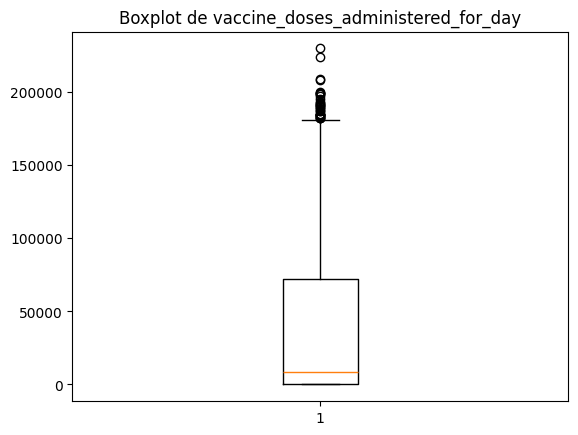

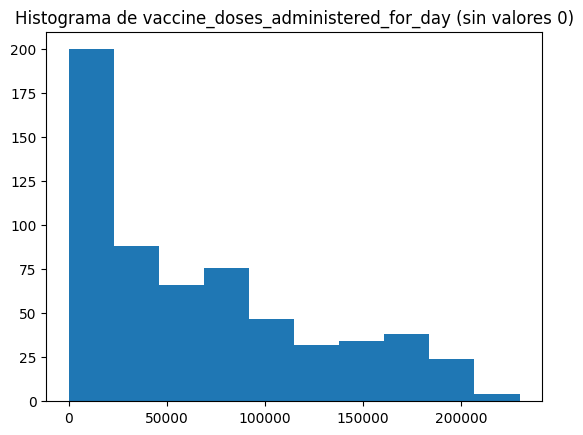

In [26]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_filtered['vaccine_doses_administered_for_day'])
plt.title('Boxplot de vaccine_doses_administered_for_day')
plt.show()

# Filtrar los datos para excluir los valores 0
df_filtered_non_zero = df_filtered[df_filtered['vaccine_doses_administered_for_day'] > 0]

# Histograma con matplotlib
plt.hist(df_filtered_non_zero['vaccine_doses_administered_for_day'], bins=10)  # el número de bins se puede ajustar a preferencia
plt.title('Histograma de vaccine_doses_administered_for_day (sin valores 0)')
plt.show()

In [27]:
avg_vaccine = round(df_ar['vaccine_doses_administered_for_day'].mean(), 0)

df_prueba = df_ar.copy()  # Crear una copia del DataFrame original

# Reemplazar los valores por encima del valor máximo o por debajo del valor mínimo con el promedio
df_prueba['vaccine_doses_administered_for_day'] = df_prueba['vaccine_doses_administered_for_day'].apply(
    lambda x: avg_vaccine if x > upper_bound or x < lower_bound else x
)


In [29]:
df_prueba.to_csv('../../data/processed/covid19_Argentina.csv', index=False)


In [30]:
df_prueba.describe()

,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,population_female,population_density,human_development_index,population_age_00_09,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,9905.94,133.18,41925.53,44938712.00,20682192.62,19523766.00,20593330.00,16.51,0.82,6718871.00,...,17.65,56.19,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
std,19475.29,155.13,56998.51,0.00,32128263.22,0.00,0.00,0.00,0.00,0.00,...,6.29,14.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,44938712.00,0.00,19523766.00,20593330.00,16.52,0.82,6718871.00,...,3.43,23.42,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
25%,605.75,8.00,0.00,44938712.00,0.00,19523766.00,20593330.00,16.52,0.82,6718871.00,...,12.44,46.47,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
50%,4374.50,73.00,8452.50,44938712.00,3682769.50,19523766.00,20593330.00,16.52,0.82,6718871.00,...,17.73,55.79,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
75%,11440.25,214.00,72484.50,44938712.00,30931468.25,19523766.00,20593330.00,16.52,0.82,6718871.00,...,22.83,65.73,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
max,174174.00,656.00,229875.00,44938712.00,109007243.00,19523766.00,20593330.00,16.52,0.82,6718871.00,...,33.09,94.58,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
